# HW3

9923081 _ 9923093 _ 40023024

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

<b>Implement 2-layer neural network</b><br>

In [35]:

class DeepNetwork:
    def __init__(self, input_size, hidden_size, output_size):

        self.weights_1 = np.random.randn(input_size, hidden_size) * 0.01 
        self.bias_1 = np.zeros((1, hidden_size))
        self.weights_2 = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_2 = np.zeros((1, output_size))

    def sigmoid(self, x):
         return 1 / (1 + np.exp(-x))

    def d_sigmoid(self, x):
        s = self.sigmoid(x)
        z = s*(1-s)
        return z

    def layer_output(self, X):
           #first layer output
        z1 = np.dot(X, self.weights_1) + self.bias_1
        out1 = self.sigmoid(z1)
        return out1

    def dot_product(self, weights, inputs): 
           
        return np.dot(inputs, weights)

    def update_weights(self, X, y, learning_rate): 
    # Forward pass
        z1 = np.dot(X, self.weights_1) + self.bias_1 
        o1 = self.sigmoid(z1)
    
        z2 = np.dot(o1, self.weights_2) + self.bias_2  
        o2 = self.sigmoid(z2)

    # Error
        error = o2 - y

    # Backpropagation
        dz2 = error * self.d_sigmoid(z2)
        delta_w2 = np.dot(o1.T, dz2)
        delta_b2 = np.sum(dz2, axis=0)

        dz1 = np.dot(dz2, self.weights_2.T) * self.d_sigmoid(z1)
        delta_w1 = np.dot(X.T, dz1)
        delta_b1 = np.sum(dz1, axis=0, keepdims=True)

        # Gradient descent update
        self.weights_1 -= learning_rate * delta_w1
        self.bias_1 -= learning_rate * delta_b1
        self.weights_2 -= learning_rate * delta_w2
        self.bias_2 -= learning_rate * delta_b2


    def predict(self, X):
        o1 = self.layer_output(X)
        z2 = self.dot_product(self.weights_2, o1) + self.bias_2
        a2 = self.sigmoid(z2)
        return a2 > 0.5

<b>Testing 2-layer network</b> <br>

In [28]:
#import XOR data
X = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
y = np.array([[0], [1], [1], [0]])

#use one data for test
X_train = np.array([[0, 0, 1], [0, 1, 1]])
y_train = np.array([[0], [1]])
X_test = np.array([[1, 1, 1],[1,0,1]])
y_test = np.array([[0],[1]])

In [29]:
input_size = 3
hidden_size = 5
output_size =1
model = DeepNetwork(input_size, hidden_size, output_size)
for epoch in range(1000):

    model.update_weights(X_train, y_train, learning_rate=0.5)
    prediction = model.predict(X_test)
    print("Test Prediction:", prediction.astype(int))
    print("True Label:", y_test)



Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
True Label: [[0]
 [1]]
Test Prediction: [[0]
 [0]]
Tru

 <b>Using data Augmentation for testing</b> <br>

In [30]:


# Function to generate XNOR dataset
def generate_xnor_data(n_samples, noise):
    # Generate binary inputs 
    X = np.random.randint(0, 2, size=(n_samples, 2))
    
    # XNOR operation
    y = np.logical_not(np.logical_xor(X[:, 0], X[:, 1])).astype(int)
    
    # Add noise to the input
    noise_matrix = np.random.normal(0, noise, size=X.shape)
    X_noisy = X + noise_matrix

    return X_noisy, y

#X_noisy, y = generate_xnor_data(n_samples=1000, noise=0.2)

# Visualize the noisy dataset 
#plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y, cmap='coolwarm', edgecolor='k')
#plt.xlabel('Input 1')
#plt.ylabel('Input 2')
#plt.title('Noisy XNOR Dataset')
#plt.show()


In [31]:
X_noisy, y = generate_xnor_data(3000, 0.5)

# Add a bias term (just like in XOR example)
X_noisy = np.hstack([X_noisy, np.ones((X_noisy.shape[0], 1))])  # Add bias term as third column

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

In [32]:
input_size = X_train.shape[1]
hidden_size = 5
output_size = 1

#define model
model = DeepNetwork(input_size, hidden_size, output_size)

Epoch 0: Accuracy = 46.33%, Error = 0.5367


Epoch 100: Accuracy = 46.33%, Error = 0.5367
Epoch 200: Accuracy = 45.17%, Error = 0.5483
Epoch 300: Accuracy = 55.50%, Error = 0.4450
Epoch 400: Accuracy = 73.00%, Error = 0.2700
Epoch 500: Accuracy = 72.33%, Error = 0.2767
Epoch 600: Accuracy = 72.50%, Error = 0.2750
Epoch 700: Accuracy = 73.50%, Error = 0.2650
Epoch 800: Accuracy = 73.17%, Error = 0.2683
Epoch 900: Accuracy = 73.17%, Error = 0.2683
Epoch 1000: Accuracy = 73.17%, Error = 0.2683
Epoch 1100: Accuracy = 73.33%, Error = 0.2667
Epoch 1200: Accuracy = 73.33%, Error = 0.2667
Epoch 1300: Accuracy = 73.33%, Error = 0.2667
Epoch 1400: Accuracy = 73.50%, Error = 0.2650
Epoch 1500: Accuracy = 73.67%, Error = 0.2633
Epoch 1600: Accuracy = 73.67%, Error = 0.2633
Epoch 1700: Accuracy = 73.83%, Error = 0.2617
Epoch 1800: Accuracy = 73.50%, Error = 0.2650
Epoch 1900: Accuracy = 73.33%, Error = 0.2667
Epoch 2000: Accuracy = 73.33%, Error = 0.2667
Epoch 2100: Accuracy = 73.67%, Error = 0.2633
Epoch 2200: Accuracy = 73.67%, Error = 0.26

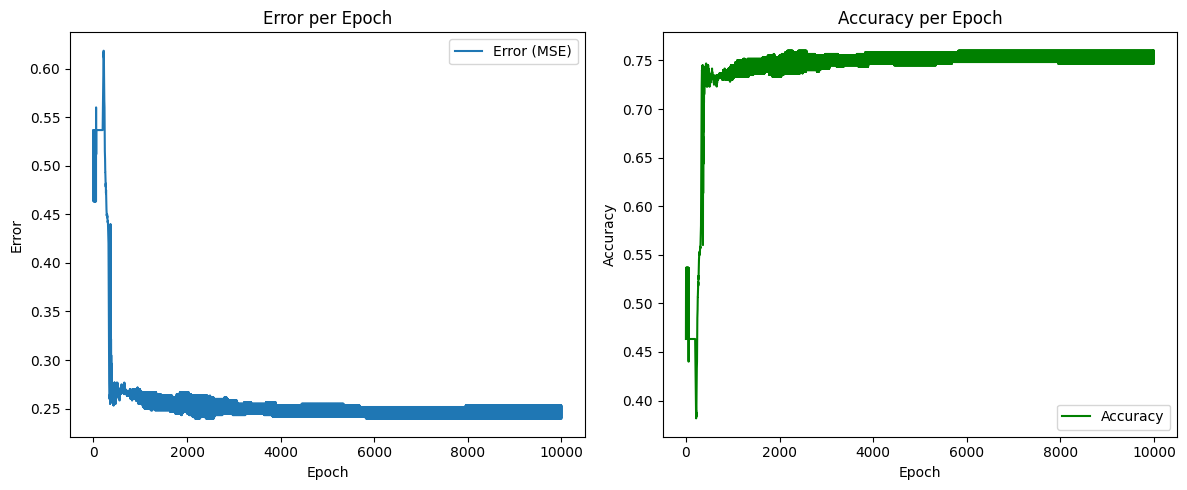

In [33]:
errors = []
accuracies = []

#training loop 
for epoch in range(10000):
    model.update_weights(X_train, y_train.reshape(-1, 1), learning_rate=0.01)

    # Test prediction
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions.astype(int))
    accuracies.append(accuracy)

    # Calculate mean squared error (MSE)
    error = np.mean((predictions - y_test.reshape(-1, 1)) ** 2)
    errors.append(error)

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Accuracy = {accuracy * 100:.2f}%, Error = {error:.4f}')

# Plotting the Error per Epoch
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(errors, label='Error (MSE)')
plt.title('Error per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

# Plotting the Accuracy per Epoch
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='green')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# california house prediction

Fetch the California housing dataset

In [7]:
c_housing = fetch_california_housing()
x = c_housing.data  # features
y = c_housing.target  # target prices

Standardize features

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Quantize the houses into 5 groups based on their prices

In [9]:
price_quantiles = np.quantile(y, q=[0.2, 0.4, 0.6, 0.8])
y_class = np.digitize(y, bins=price_quantiles)

Train-test spli

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_class, test_size=0.2, random_state=42)

Define and train the neural network

In [11]:
class DeepNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_1 = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_1 = np.zeros((1, hidden_size))
        self.weights_2 = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        x = np.clip(x, -500, 500)  # Constrain the range to avoid overflow
        return 1 / (1 + np.exp(-x))

    def d_sigmoid(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def layer_output(self, X):
        z1 = np.dot(X, self.weights_1) + self.bias_1
        out1 = self.sigmoid(z1)
        return out1

    def update_weights(self, X, y, learning_rate):
        # Forward pass
        z1 = np.dot(X, self.weights_1) + self.bias_1
        o1 = self.sigmoid(z1)
        z2 = np.dot(o1, self.weights_2) + self.bias_2
        o2 = self.softmax(z2)

        # Compute error (Cross-entropy loss gradient)
        error = o2 - y

        # Backpropagation
        dz2 = error
        delta_w2 = np.dot(o1.T, dz2)
        delta_b2 = np.sum(dz2, axis=0, keepdims=True)

        dz1 = np.dot(dz2, self.weights_2.T) * self.d_sigmoid(z1)
        delta_w1 = np.dot(X.T, dz1)
        delta_b1 = np.sum(dz1, axis=0, keepdims=True)

        # Gradient descent update
        self.weights_1 -= learning_rate * delta_w1
        self.bias_1 -= learning_rate * delta_b1
        self.weights_2 -= learning_rate * delta_w2
        self.bias_2 -= learning_rate * delta_b2

    def predict(self, X):
        o1 = self.layer_output(X)
        z2 = np.dot(o1, self.weights_2) + self.bias_2
        o2 = self.softmax(z2)
        return np.argmax(o2, axis=1)

Train the network

In [12]:
input_size = x_train.shape[1]
hidden_size = 32
output_size = len(np.unique(y_class))

model = DeepNetwork(input_size, hidden_size, output_size)

# One-hot encoding for training labels
y_train_one_hot = np.eye(output_size)[y_train]

Train the model

In [13]:
epochs = 3500
learning_rate = 0.001
train_errors = []

for epoch in range(epochs):
    model.update_weights(x_train, y_train_one_hot, learning_rate)

    # Evaluate accuracy
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Accuracy = {accuracy * 100:.2f}%")

# Final evaluation
final_predictions = model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, final_predictions))

Epoch 0: Accuracy = 20.06%
Epoch 500: Accuracy = 45.83%
Epoch 1000: Accuracy = 40.53%
Epoch 1500: Accuracy = 49.10%
Epoch 2000: Accuracy = 45.20%
Epoch 2500: Accuracy = 47.94%
Epoch 3000: Accuracy = 44.57%
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.94      0.67       828
           1       0.50      0.00      0.00       816
           2       0.00      0.00      0.00       851
           3       0.34      0.92      0.49       829
           4       0.92      0.43      0.58       804

    accuracy                           0.46      4128
   macro avg       0.46      0.46      0.35      4128
weighted avg       0.45      0.46      0.35      4128



c:\Users\NaderZadeh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NaderZadeh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NaderZadeh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Analyze model performance and improvements

In [14]:
train_accuracies = []
train_losses = []

for epoch in range(epochs):
    # Update weights during training
    model.update_weights(x_train, y_train_one_hot, learning_rate)
    
    # Predictions on the training data
    train_predictions = model.predict(x_train)
    
    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_accuracies.append(train_accuracy)
    
    # Calculate cross-entropy loss on training data
    z1 = np.dot(x_train, model.weights_1) + model.bias_1
    o1 = model.sigmoid(z1)
    z2 = np.dot(o1, model.weights_2) + model.bias_2
    o2 = model.softmax(z2)
    train_loss = -np.mean(np.sum(y_train_one_hot * np.log(o2 + 1e-8), axis=1))
    train_losses.append(train_loss)
    
    # Print progress every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Train Accuracy = {train_accuracy * 100:.2f}%, Train Loss = {train_loss:.4f}")

Epoch 0: Train Accuracy = 41.18%, Train Loss = 1.8991
Epoch 500: Train Accuracy = 42.10%, Train Loss = 1.5322
Epoch 1000: Train Accuracy = 47.55%, Train Loss = 1.3385
Epoch 1500: Train Accuracy = 47.47%, Train Loss = 1.3793
Epoch 2000: Train Accuracy = 40.73%, Train Loss = 1.5610
Epoch 2500: Train Accuracy = 48.78%, Train Loss = 1.5787
Epoch 3000: Train Accuracy = 48.40%, Train Loss = 1.5976


Plot Training Accuracy and Loss

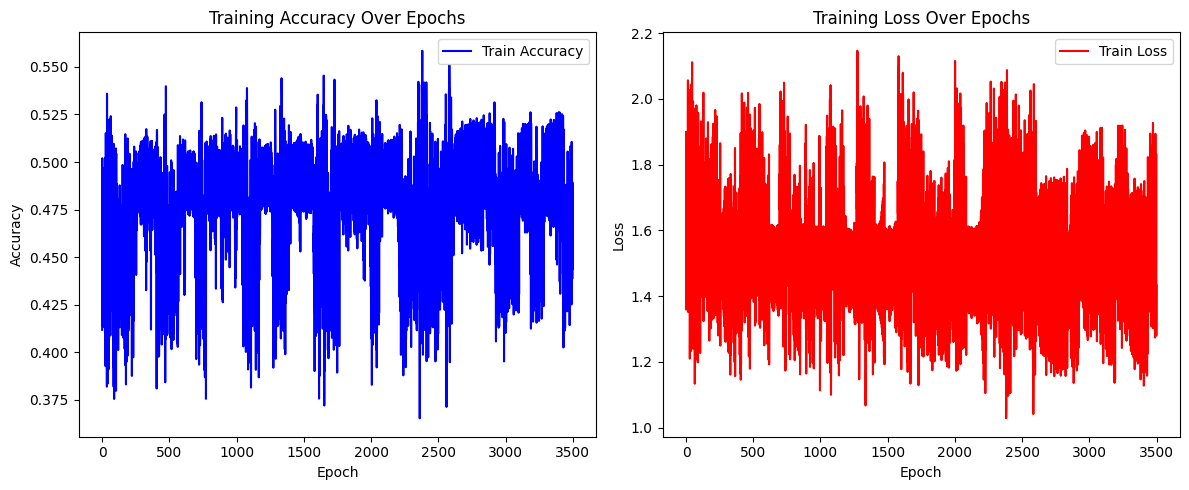

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_accuracies, label="Train Accuracy", color="blue")
plt.title("Training Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_losses, label="Train Loss", color="red")
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

 Increasing layers often improves the ability of the network to capture complex patterns. However, it may also lead to overfitting or difficulty in convergence, as deeper networks require more careful weight initialization, regularization, and tuning.

Define a deep neural network with more than 3 layers

In [16]:
class DeepNetworkExtended:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.layers = len(hidden_sizes) + 1
        self.weights = []
        self.biases = []

        # Initialize weights and biases for all layers
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.01)
            self.biases.append(np.zeros((1, layer_sizes[i + 1])))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def d_sigmoid(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def forward(self, X):
        activations = [X]
        for i in range(len(self.weights) - 1):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            activations.append(self.sigmoid(z))
        # Output layer
        z = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        activations.append(self.softmax(z))
        return activations

    def update_weights(self, X, y, learning_rate):
        activations = self.forward(X)
        error = activations[-1] - y

        # Backpropagation
        deltas = [error]
        for i in range(len(self.weights) - 1, 0, -1):
            dz = np.dot(deltas[0], self.weights[i].T) * self.d_sigmoid(np.dot(activations[i - 1], self.weights[i - 1]) + self.biases[i - 1])
            deltas.insert(0, dz)

        # Gradient descent update
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * np.dot(activations[i].T, deltas[i])
            self.biases[i] -= learning_rate * np.sum(deltas[i], axis=0, keepdims=True)

    def predict(self, X):
        activations = self.forward(X)
        return np.argmax(activations[-1], axis=1)

Initialize and train the extended model

In [21]:
input_size = x_train.shape[1]
hidden_sizes = [64, 64, 16]  # More than 3 layers
output_size = len(np.unique(y_class))

model = DeepNetworkExtended(input_size, hidden_sizes, output_size)
y_train_one_hot = np.eye(output_size)[y_train]

In [24]:
epochs = 3500
learning_rate = 0.001
train_accuracies, val_accuracies = [], []
train_losses, val_losses = [], []

for epoch in range(epochs):
    model.update_weights(x_train, y_train_one_hot, learning_rate)

    # Train metrics
    train_predictions = model.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_accuracies.append(train_accuracy)

    z1 = model.forward(x_train)[-1]
    train_loss = -np.mean(np.sum(y_train_one_hot * np.log(z1 + 1e-8), axis=1))
    train_losses.append(train_loss)

    # Validation metrics
    val_predictions = model.predict(x_test)
    val_accuracy = accuracy_score(y_test, val_predictions)
    val_accuracies.append(val_accuracy)

    z2 = model.forward(x_test)[-1]
    val_loss = -np.mean(np.sum(np.eye(output_size)[y_test] * np.log(z2 + 1e-8), axis=1))
    val_losses.append(val_loss)

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Train Accuracy = {train_accuracy * 100:.4f}%, Val Accuracy = {val_accuracy * 100:.4f}%")

Epoch 0: Train Accuracy = 20.0339%, Val Accuracy = 19.7674%
Epoch 500: Train Accuracy = 20.0339%, Val Accuracy = 19.7674%
Epoch 1000: Train Accuracy = 19.9370%, Val Accuracy = 20.0581%
Epoch 1500: Train Accuracy = 20.1429%, Val Accuracy = 19.4767%
Epoch 2000: Train Accuracy = 20.1429%, Val Accuracy = 19.4767%
Epoch 2500: Train Accuracy = 20.1429%, Val Accuracy = 19.4767%
Epoch 3000: Train Accuracy = 19.9067%, Val Accuracy = 20.6153%


Final evaluation

In [25]:
final_predictions = model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, final_predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.20      1.00      0.33       828
           1       0.00      0.00      0.00       816
           2       0.00      0.00      0.00       851
           3       0.00      0.00      0.00       829
           4       0.00      0.00      0.00       804

    accuracy                           0.20      4128
   macro avg       0.04      0.20      0.07      4128
weighted avg       0.04      0.20      0.07      4128



c:\Users\NaderZadeh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NaderZadeh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\NaderZadeh\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


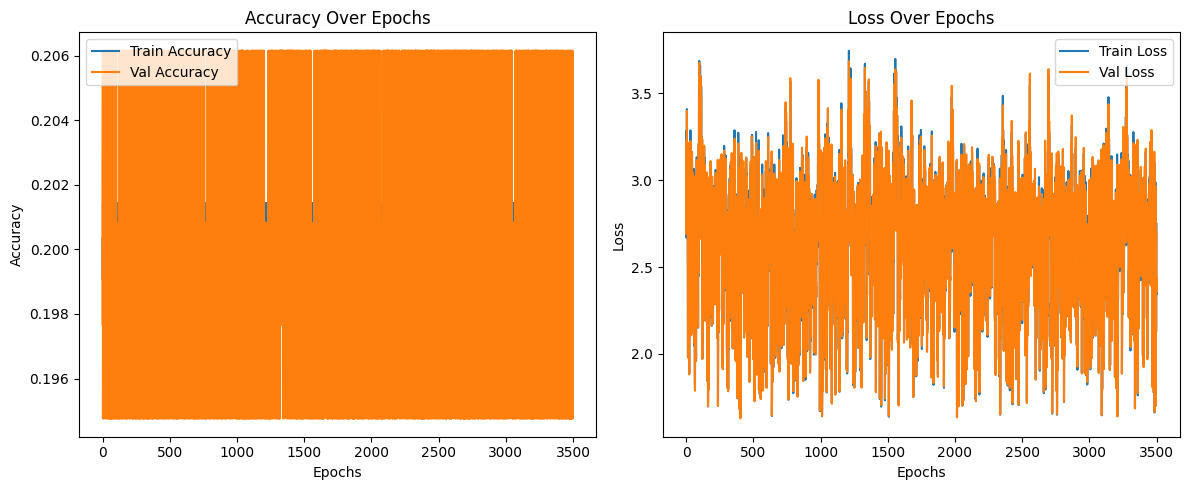

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_accuracies, label="Train Accuracy")
plt.plot(range(epochs), val_accuracies, label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_losses, label="Train Loss")
plt.plot(range(epochs), val_losses, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

Analysis of overfitting
1. If the training accuracy and validation accuracy diverge significantly, the model overfits.
2. Adding regularization or dropout layers can help combat overfitting in larger models.
3. Tuning hyperparameters such as learning rate, number of layers, and neurons can improve generalization.

What is the effect of increasing layers in the network?
1. Improved Capacity: Adding more layers allows the network to learn more complex representations of the data.
2. Risk of Overfitting: More layers can overfit the training data, especially if the model has more parameters than the data can support.
3. Training Challenges:
    1. Vanishing gradients may hinder learning in deep networks.
    2. Requires more computational resources and tuning of hyperparameters.